In [1]:
import os
import numpy

In [2]:
ws_folder = r'D:\PhD_Workspace\MISR_AHI_WS\240113'
MISR_RAA_infos_npy = os.path.join(ws_folder, 'analysis', 'MISR_RAA-matched_infos_10km_land.npy')
MISR_RAY_infos_npy = os.path.join(ws_folder, 'analysis', 'MISR_RAY-matched_infos_10km_land.npy')

In [3]:
RAA_matched_infos = numpy.load(MISR_RAA_infos_npy)
RAY_matched_infos = numpy.load(MISR_RAY_infos_npy)

In [4]:
RAA_matched_infos[0]

array(['190.15', '-18.95', '65', '97154', '7', '201803242134',
       '201803242130', '60.565', '59.613', '182.025', '285.481', '34.786',
       '34.786', '56.600', '56.600'], dtype='<U12')

In [5]:
MISR_ANGLE = [0.0, 26.1, 45.6, 60.0, 70.5]

CAMERA_ANGLE = {
    0: 70.5,
    1: 60.0,
    2: 45.6,
    3: 26.1,
    4: 0.0,
    5: 26.1,
    6: 45.6,
    7: 60.0,
    8: 70.5
}


def get_bar_record(matched_record, camera_idx_record_idx):
    bar_record = [[], [], [], [], [], [], [], [], [], [], [], []]    # latitude range
    for record_item in matched_record:
        roi_lat = float(record_item[1])
        camera_angle_idx = int(record_item[camera_idx_record_idx])
        camera_angle = CAMERA_ANGLE[camera_angle_idx]
        lat_array_idx = int(12 - (roi_lat + 60) / 10)   # 12 group with 10° internal
        bar_record[lat_array_idx].append(camera_angle)
    return bar_record


def get_bar_data(bar_record):
    bar_data = []
    for bar_record_item in bar_record:
        bar_data_item = []
        for m_angle in MISR_ANGLE:
            angle_count = bar_record_item.count(m_angle)
            bar_data_item.append(angle_count)
        bar_data.append(bar_data_item)
    return bar_data

In [6]:
ray_bar_record = get_bar_record(RAY_matched_infos, 4)
raa_bar_record = get_bar_record(RAA_matched_infos, 4)

RAY_latitudes_info_count = get_bar_data(ray_bar_record)
RAA_latitudes_info_count = get_bar_data(raa_bar_record)

### mapping

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [8]:
def mapping_double_bar_angle(ray_bar_data, raa_bar_data, save_flag=0):
    plt.figure(figsize=(12,8))

    bar_width = 0.35
    x_array = numpy.arange(1, 13, 1)
    ray_bar_data_T = numpy.array(ray_bar_data).T
    raa_bar_data_T = numpy.array(raa_bar_data).T

    ray_bottom_array = numpy.zeros((12,))
    raa_bottom_array = numpy.zeros((12,))
    bar_hatchs = ['..', '//', '\\\\', '/', '\\']
    bar_colors = ['lavenderblush', 'lavender', 'lightcyan', 'oldlace', 'mistyrose']
    bar_labels = ['0.0°', '26.1°', '45.6°', '60.0°', '70.5°']
    for bar_lat_idx in range(len(ray_bar_data_T)):
        ray_bar_lat = ray_bar_data_T[bar_lat_idx]
        raa_bar_lat = raa_bar_data_T[bar_lat_idx]
        plt.bar(x_array - bar_width/2, ray_bar_lat, width=bar_width, color=bar_colors[bar_lat_idx], bottom=ray_bottom_array, edgecolor='black', hatch=bar_hatchs[bar_lat_idx], label=bar_labels[bar_lat_idx])
        plt.bar(x_array + bar_width/2, raa_bar_lat, width=bar_width, color=bar_colors[bar_lat_idx], bottom=raa_bottom_array, edgecolor='black', hatch=bar_hatchs[bar_lat_idx])
        ray_bottom_array = ray_bottom_array + ray_bar_lat
        raa_bottom_array = raa_bottom_array + raa_bar_lat

    # mapping
    plt.grid(which='both', linestyle='--', linewidth=0.6, axis='y')
    plt.xlabel('Latitude Ranges', fontsize=15)
    x_minor_locator = plt.MultipleLocator(1)
    x_major_locator = plt.MultipleLocator(1)
    x_labels = ['', '60°N-50°N', '50°N-40°N', '40°N-30°N', '30°N-20°N', '20°N-10°N', '10°N-0°', '0°-10°S', '10°S-20°S', '20°S-30°S', '30°S-40°S', '40°S-50°S', '50°S-60°S']
    plt.xticks(numpy.arange(0, 13, 1), x_labels)
    plt.tick_params(axis='x', rotation=20)
    plt.gca().xaxis.set_major_locator(x_major_locator)
    plt.tick_params(axis="y", which='minor', length=3, labelsize=10)
    plt.tick_params(axis="y", which='major', length=5, labelsize=15)
    plt.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')
    sf1 = ScalarFormatter(useMathText=True)
    sf1.set_powerlimits((0, 0))
    plt.gca().yaxis.set_major_formatter(sf1)
    plt.gca().yaxis.get_offset_text().set(size=15)
    plt.tick_params(axis="x", which='minor', length=3, labelsize=10)
    plt.tick_params(axis="x", which='major', length=5, labelsize=15)
    plt.yscale('log')  # 设置 y 轴为对数刻度
    plt.ylabel('Count of Matched Pairs (log scale)', fontsize=18)
    plt.legend(loc=1, fontsize=14, title='Camera angle of MISR', title_fontsize=14)
    if save_flag:
        plt.savefig(os.path.join(ws_folder, 'display', 'MISR_RAA_RAY-matched_count_land.png'), bbox_inches='tight', dpi=500)

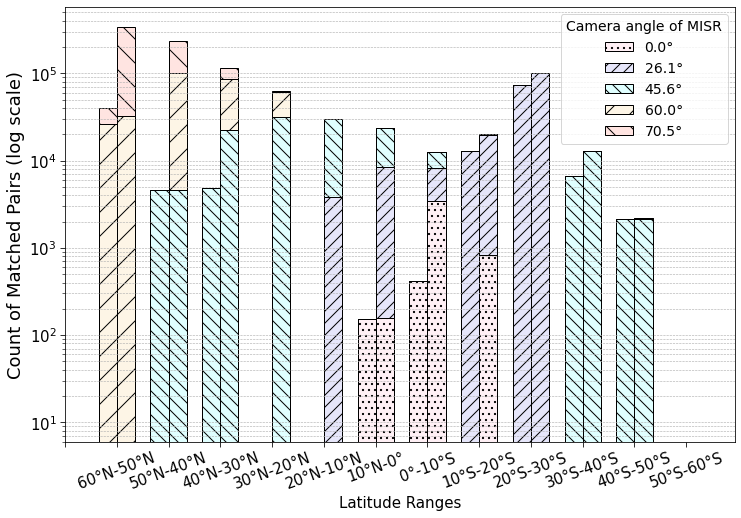

In [9]:
mapping_double_bar_angle(RAY_latitudes_info_count, RAA_latitudes_info_count, 1)